预测值与真实值的标准差：2.2
2.15269302337


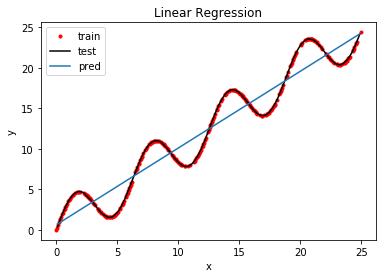

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

def evaluate(ys, ys_pred):
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

def main(x_train, y_train):
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = np.expand_dims(x_train, axis=1)
    phi = np.concatenate([phi0, phi1], axis=1)
    w = np.dot(np.linalg.pinv(phi), y_train)

    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = np.expand_dims(x, axis=1)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y
        pass
    
    return f

if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'

    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)

    f = main(x_train, y_train)
    y_test_pred = f(x_test)

    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()
